<img align="center" src="https://cloud.shopback.com/c_scale,c_auto,q_70,f_webp/media-production-aps1/mGzFKe0Q7rI/aHR0cHM6Ly9pbWFnZXMuYmFubmVyYmVhci5jb20vZGlyZWN0L0VHQnFwQVo1T2U5MTg5VkROSi9yZXF1ZXN0cy8wMDAvMDg4LzAxNS85NzkvTVJqNTJad29hNnhkOWVHMDZ4V2tkTzNlRS83YmVhNzU1NWJlYzI2YzljNDBmNzdiNzQwMGIxYjdmZWFlOTkwZTliLnBuZw.jpg" />

# **apple_music_analysis**

This study uses Spotify popularity metrics as proxy indicators due to the lack of publicly available Apple Music consumption data. These metrics may not directly reflect listener behavior on Apple Music and should be interpreted as cross-platform reference values rather than exact measures of popularity.

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df_raw = pd.read_csv("./data/apple_music_dataset.csv")
display(df_raw.head())
display(df_raw.tail())

,artistId,artistName,collectionCensoredName,collectionId,collectionName,collectionPrice,contentAdvisoryRating,country,currency,discCount,...,primaryGenreName,releaseDate,trackCensoredName,trackCount,trackExplicitness,trackId,trackName,trackNumber,trackPrice,trackTimeMillis
0,46087,Erick Sermon,Music,298321651,Music,9.99,Explicit,USA,USD,1,...,Hip-Hop/Rap,2001-08-27T12:00:00Z,Music (feat. Marvin Gaye),16,explicit,298321904,Music,4,1.29,223133
1,20044,Madonna,Music,80815197,Music,9.99,NaN,USA,USD,1,...,Pop,2000-08-21T07:00:00Z,Music,10,notExplicit,80815173,Music,1,1.29,225973
2,486597,Journey,Greatest Hits (2024 Remaster),169003304,Greatest Hits (2024 Remaster),10.99,NaN,USA,USD,1,...,Rock,1981-06-03T07:00:00Z,Don't Stop Believin' (2024 Remaster),16,notExplicit,169003415,Don't Stop Believin' (2024 Remaster),2,1.29,250835
3,156987,Jason Mraz,We Sing. We Dance. We Steal Things,277635758,We Sing. We Dance. We Steal Things,11.99,NaN,USA,USD,1,...,Pop,2008-02-12T08:00:00Z,I'm Yours,12,notExplicit,277635828,I'm Yours,2,1.29,242947
4,46087,Erick Sermon,Music,298429528,Music,9.99,Clean,USA,USD,1,...,Hip-Hop/Rap,2001-05-29T07:00:00Z,Music (feat. Marvin Gaye),16,cleaned,298429596,Music,4,1.29,223133


,artistId,artistName,collectionCensoredName,collectionId,collectionName,collectionPrice,contentAdvisoryRating,country,currency,discCount,...,primaryGenreName,releaseDate,trackCensoredName,trackCount,trackExplicitness,trackId,trackName,trackNumber,trackPrice,trackTimeMillis
9995,5192163,Dave Matthews & Tim Reynolds,Live At Radio City (Bonus Track Version),261552981,Live At Radio City (Bonus Track Version),12.99,NaN,USA,USD,2,...,Rock,2007-08-14T12:00:00Z,So Damn Lucky (Live),14,notExplicit,261553091,So Damn Lucky,6,1.29,411640
9996,214135551,Red,Until We Have Faces,416155893,Until We Have Faces,9.99,NaN,USA,USD,1,...,Rock,2011-02-01T12:00:00Z,Faceless,11,notExplicit,416155943,Faceless,2,1.29,203520
9997,121582,The Isley Brothers,The Essential Isley Brothers,198017385,The Essential Isley Brothers,14.99,NaN,USA,USD,2,...,R&B/Soul,1973-07-14T07:00:00Z,"That Lady, Pts. 1 & 2",18,notExplicit,198017838,"That Lady, Pts. 1 & 2",2,1.29,334387
9998,91157642,David Eisley & Bob Kulick,Spongebob Squarepants - The Yellow Album,283379708,Spongebob Squarepants - The Yellow Album,9.99,NaN,USA,USD,1,...,Children's Music,2005-11-15T12:00:00Z,Sweet Victory,23,notExplicit,283379767,Sweet Victory,2,1.29,126653
9999,540530,Pat Benatar,Greatest Hits,715881927,Greatest Hits,9.99,NaN,USA,USD,1,...,Rock,1979-08-27T07:00:00Z,Heartbreaker (2005 Remaster),20,notExplicit,715882411,Heartbreaker (2005 Remaster),1,1.29,208307


In [100]:
df_raw["country"].unique()

array(['USA'], dtype=object)

- Dataset consist of USA only -> X need to mainatin country column

In [101]:
track_df = df_raw.drop(columns="country")

In [102]:
track_df.sort_values("releaseDate")

,artistId,artistName,collectionCensoredName,collectionId,collectionName,collectionPrice,contentAdvisoryRating,currency,discCount,discNumber,...,primaryGenreName,releaseDate,trackCensoredName,trackCount,trackExplicitness,trackId,trackName,trackNumber,trackPrice,trackTimeMillis
8925,13563,Air Supply,Ultimate Air Supply,303178192,Ultimate Air Supply,9.99,NaN,USD,1,1,...,Pop,1900-01-01T12:00:00Z,The One That You Love,18,notExplicit,303178198,The One That You Love,5,1.29,253800
9282,2321181,Eartha Kitt,The Essential Eartha Kitt,425014259,The Essential Eartha Kitt,14.99,NaN,USD,2,1,...,Christmas: Classic,1900-01-01T12:00:00Z,Santa Baby,20,notExplicit,425014318,Santa Baby,9,1.29,206507
7468,17387,SWV,It's About Time,266799911,It's About Time,9.99,NaN,USD,1,1,...,R&B/Soul,1900-01-01T12:00:00Z,Right Here (Human Nature Radio Mix),15,notExplicit,266800348,Right Here,15,1.29,226947
7701,547019,The Hollies,The Hollies' Greatest Hits,192969896,The Hollies' Greatest Hits,9.99,NaN,USD,1,1,...,Rock,1900-01-01T12:00:00Z,Bus Stop,13,notExplicit,192969898,Bus Stop,1,1.29,174533
3003,15412031,Men At Work,Contraband: The Best of Men At Work,203772047,Contraband: The Best of Men At Work,9.99,NaN,USD,1,1,...,Rock,1900-01-01T12:00:00Z,Who Can It Be Now?,16,notExplicit,203772420,Who Can It Be Now?,1,1.29,200493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4173,15885,USHER,COMING HOME,1708795597,COMING HOME,5.99,NaN,USD,1,1,...,R&B/Soul,2024-02-09T08:00:00Z,Stone Kold Freak,19,notExplicit,1708795666,Stone Kold Freak,9,0.69,214662
4171,15885,USHER,COMING HOME,1708795597,COMING HOME,5.99,Explicit,USD,1,1,...,R&B/Soul,2024-02-09T08:00:00Z,Luckiest Man,19,explicit,1708795673,Luckiest Man,16,0.69,201673
4168,15885,USHER,COMING HOME,1708795597,COMING HOME,5.99,NaN,USD,1,1,...,R&B/Soul,2024-02-09T08:00:00Z,Bop,19,notExplicit,1708795605,Bop,8,0.69,222985
4295,15885,USHER,COMING HOME,1708795597,COMING HOME,5.99,Explicit,USD,1,1,...,R&B/Soul,2024-02-09T08:00:00Z,Room In a Room,19,explicit,1708795675,Room In a Room,18,0.69,137918


# **Use Spotify API for Artist/Track Popularity**

In [18]:
# Spotify API 인증
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import requests
import pprint
from spotipy.oauth2 import SpotifyOAuth
#----------------------#
#시각화
import matplotlib.pyplot as plt
import seaborn as sns

session = requests.Session()
session.trust_env = False 

URI = 'http://127.0.0.1:9090/callback' 
CLIENT_ID = '317f5cdd80504f37b00bd8a02de80065'
CLIENT_SECRET = 'dd650241d8b743bd8c1d6f148965c6f0'

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET,
        redirect_uri=URI,
        scope="user-read-private", 
        open_browser=True
    ))

print("인증 설정 완료")

인증 설정 완료


In [22]:
artist_df = (
    track_df[["artistName"]]
    .drop_duplicates()
    .rename(columns={"artistName": "artist_name"})
    .reset_index(drop=True)
)
def search_artist(name):
    result = sp.search(q=f"artist:{name}", type="artist", limit=5)
    items = result["artists"]["items"]
    if not items:
        return None

    # 가장 popularity 높은 아티스트 선택
    artist = max(items, key=lambda x: x["popularity"])
    return {
        "artist_name_spotify": artist["name"],
        "spotify_artist_id": artist["id"],
        "artist_popularity": artist["popularity"],
        "followers": artist["followers"]["total"],
        "genres": artist["genres"]
    }
spotify_artists = []

for name in artist_df["artist_name"]:
    info = search_artist(name)
    if info:
        spotify_artists.append(info)
def get_top_tracks(artist_id, market="US"):
    tracks = sp.artist_top_tracks(artist_id, country=market)["tracks"]
    return [{
        "spotify_artist_id": artist_id,
        "track_name": t["name"],
        "track_popularity": t["popularity"],
        "duration_ms": t["duration_ms"]
    } for t in tracks]
top_tracks = []
for artist in spotify_artists:
    top_tracks.extend(get_top_tracks(artist["spotify_artist_id"]))


In [103]:
from rapidfuzz import fuzz

def match_track(apple_name, spotify_name):
    return fuzz.token_sort_ratio(apple_name, spotify_name) >= 85

In [104]:
artist_spotify_df = pd.DataFrame(spotify_artists)

In [105]:
artist_spotify_df

,artist_name_spotify,spotify_artist_id,artist_popularity,followers,genres
0,Erick Sermon,2VX0o9LDIVmKIgpnwdJpOJ,53,264934,"[east coast hip hop, old school hip hop]"
1,Madonna,6tbjWDEIzxoDsBA1FuhfPW,81,8932028,[]
2,Journey,0rvjqX7ttXeg3mTy8Xscbt,76,6641390,"[aor, classic rock]"
3,Jason Mraz,4phGZZrJZRo4ElhRtViYdl,73,7331732,"[soft pop, acoustic pop]"
4,Shakira,0EmeFodog0BfCgMzAIvKQp,88,40664426,[latin pop]
...,...,...,...,...,...
1606,Lee Ann Womack,738OS3zrCO782uDiUN9pet,56,818862,[country]
1607,Heartland,6B10yUcmUVw4RPKe6j58E9,45,39709,[]
1608,The Isley Brothers,53QzNeFpzAaXYnrDBbDrIp,62,2058282,"[motown, quiet storm, soul, classic soul, funk..."
1609,Andrew Belle,3UAk61T8PItbpgEi9u7ofY,56,258973,[]


In [106]:
track_spotify_df = pd.DataFrame(top_tracks)
track_spotify_df

,spotify_artist_id,track_name,track_popularity,duration_ms
0,2VX0o9LDIVmKIgpnwdJpOJ,Music (feat. Marvin Gaye),46,223133
1,2VX0o9LDIVmKIgpnwdJpOJ,How Do You Know,49,151951
2,2VX0o9LDIVmKIgpnwdJpOJ,Look At 'Em,43,170020
3,2VX0o9LDIVmKIgpnwdJpOJ,React (feat. Redman),49,217840
4,2VX0o9LDIVmKIgpnwdJpOJ,Like That,39,202500
...,...,...,...,...
15656,0lFI9B2QSbFVqS6gAZzg1a,Chapel of the Sick,25,236446
15657,0lFI9B2QSbFVqS6gAZzg1a,Cult of Death,27,285709
15658,0lFI9B2QSbFVqS6gAZzg1a,Futurephobia,26,277893
15659,0lFI9B2QSbFVqS6gAZzg1a,UxFxTx (United for Thrash),26,218320


In [107]:
artist_merged_df = artist_df.merge(
    artist_spotify_df,
    left_on="artist_name",
    right_on="artist_name_spotify",
    how="left"
)
artist_merged_df

,artist_name,artist_name_spotify,spotify_artist_id,artist_popularity,followers,genres
0,Erick Sermon,Erick Sermon,2VX0o9LDIVmKIgpnwdJpOJ,53.0,264934.0,"[east coast hip hop, old school hip hop]"
1,Madonna,Madonna,6tbjWDEIzxoDsBA1FuhfPW,81.0,8932028.0,[]
2,Journey,Journey,0rvjqX7ttXeg3mTy8Xscbt,76.0,6641390.0,"[aor, classic rock]"
3,Jason Mraz,Jason Mraz,4phGZZrJZRo4ElhRtViYdl,73.0,7331732.0,"[soft pop, acoustic pop]"
4,Shakira,Shakira,0EmeFodog0BfCgMzAIvKQp,88.0,40664426.0,[latin pop]
...,...,...,...,...,...,...
2016,The Isley Brothers,The Isley Brothers,53QzNeFpzAaXYnrDBbDrIp,62.0,2058282.0,"[motown, quiet storm, soul, classic soul, funk..."
2017,"Nat ""King"" Cole & Natalie Cole",NaN,NaN,NaN,NaN,NaN
2018,Andrew Belle,Andrew Belle,3UAk61T8PItbpgEi9u7ofY,56.0,258973.0,[]
2019,Violator,Violator,0lFI9B2QSbFVqS6gAZzg1a,33.0,113043.0,"[thrash metal, speed metal, groove metal]"


In [108]:
artist_merged_df.isna().mean()

artist_name            0.000000
artist_name_spotify    0.300346
spotify_artist_id      0.300346
artist_popularity      0.300346
followers              0.300346
genres                 0.300346
dtype: float64

In [109]:
artist_genre_df = artist_merged_df.explode("genres")

In [110]:
artist_genre_df = artist_genre_df.dropna(subset=["genres"])

In [111]:
apple_track_df = track_df[[
    "artistName",
    "trackName",
    "trackExplicitness",
    "trackNumber",
    "collectionPrice"
]]
apple_track_df

,artistName,trackName,trackExplicitness,trackNumber,collectionPrice
0,Erick Sermon,Music,explicit,4,9.99
1,Madonna,Music,notExplicit,1,9.99
2,Journey,Don't Stop Believin' (2024 Remaster),notExplicit,2,10.99
3,Jason Mraz,I'm Yours,notExplicit,2,11.99
4,Erick Sermon,Music,cleaned,4,9.99
...,...,...,...,...,...
9995,Dave Matthews & Tim Reynolds,So Damn Lucky,notExplicit,6,12.99
9996,Red,Faceless,notExplicit,2,9.99
9997,The Isley Brothers,"That Lady, Pts. 1 & 2",notExplicit,2,14.99
9998,David Eisley & Bob Kulick,Sweet Victory,notExplicit,2,9.99


In [112]:
final_track_df = apple_track_df.merge(
    track_spotify_df,
    left_on="artistName",
    right_on="spotify_artist_id",
    how="left"
)
final_track_df

,artistName,trackName,trackExplicitness,trackNumber,collectionPrice,spotify_artist_id,track_name,track_popularity,duration_ms
0,Erick Sermon,Music,explicit,4,9.99,NaN,NaN,NaN,NaN
1,Madonna,Music,notExplicit,1,9.99,NaN,NaN,NaN,NaN
2,Journey,Don't Stop Believin' (2024 Remaster),notExplicit,2,10.99,NaN,NaN,NaN,NaN
3,Jason Mraz,I'm Yours,notExplicit,2,11.99,NaN,NaN,NaN,NaN
4,Erick Sermon,Music,cleaned,4,9.99,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9995,Dave Matthews & Tim Reynolds,So Damn Lucky,notExplicit,6,12.99,NaN,NaN,NaN,NaN
9996,Red,Faceless,notExplicit,2,9.99,NaN,NaN,NaN,NaN
9997,The Isley Brothers,"That Lady, Pts. 1 & 2",notExplicit,2,14.99,NaN,NaN,NaN,NaN
9998,David Eisley & Bob Kulick,Sweet Victory,notExplicit,2,9.99,NaN,NaN,NaN,NaN


In [113]:
artist_merged_df.head()
artist_merged_df[["artist_name", "artist_popularity"]].describe()
artist_merged_df.sample(10)[["artist_name", "artist_name_spotify"]]

,artist_name,artist_name_spotify
988,Marshmello & Kane Brown,NaN
1768,Pat Green,Pat Green
399,MUTEMATH,NaN
1476,Aretha Franklin,Aretha Franklin
1390,Laura Branigan,Laura Branigan
1747,JJ Heller,JJ Heller
1118,The Lacs,The Lacs
1181,Coconut Records,Coconut Records
1151,Jonny Diaz,Jonny Diaz
574,DHT,NaN


In [114]:
apple_artist_df = (
    track_df[["artistName"]]
    .drop_duplicates()
    .rename(columns={"artistName": "artist_name"})
)
apple_artist_df = apple_artist_df.merge(
    artist_spotify_df[[
        "artist_name_spotify",
        "spotify_artist_id",
        "artist_popularity"
    ]],
    left_on="artist_name",
    right_on="artist_name_spotify",
    how="left"
)
track_df = track_df.merge(
    apple_artist_df[[
        "artist_name",
        "spotify_artist_id",
        "artist_popularity"
    ]],
    left_on="artistName",
    right_on="artist_name",
    how="left"
)
track_df

,artistId,artistName,collectionCensoredName,collectionId,collectionName,collectionPrice,contentAdvisoryRating,currency,discCount,discNumber,...,trackCount,trackExplicitness,trackId,trackName,trackNumber,trackPrice,trackTimeMillis,artist_name,spotify_artist_id,artist_popularity
0,46087,Erick Sermon,Music,298321651,Music,9.99,Explicit,USD,1,1,...,16,explicit,298321904,Music,4,1.29,223133,Erick Sermon,2VX0o9LDIVmKIgpnwdJpOJ,53.0
1,20044,Madonna,Music,80815197,Music,9.99,NaN,USD,1,1,...,10,notExplicit,80815173,Music,1,1.29,225973,Madonna,6tbjWDEIzxoDsBA1FuhfPW,81.0
2,486597,Journey,Greatest Hits (2024 Remaster),169003304,Greatest Hits (2024 Remaster),10.99,NaN,USD,1,1,...,16,notExplicit,169003415,Don't Stop Believin' (2024 Remaster),2,1.29,250835,Journey,0rvjqX7ttXeg3mTy8Xscbt,76.0
3,156987,Jason Mraz,We Sing. We Dance. We Steal Things,277635758,We Sing. We Dance. We Steal Things,11.99,NaN,USD,1,1,...,12,notExplicit,277635828,I'm Yours,2,1.29,242947,Jason Mraz,4phGZZrJZRo4ElhRtViYdl,73.0
4,46087,Erick Sermon,Music,298429528,Music,9.99,Clean,USD,1,1,...,16,cleaned,298429596,Music,4,1.29,223133,Erick Sermon,2VX0o9LDIVmKIgpnwdJpOJ,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10588,5192163,Dave Matthews & Tim Reynolds,Live At Radio City (Bonus Track Version),261552981,Live At Radio City (Bonus Track Version),12.99,NaN,USD,2,1,...,14,notExplicit,261553091,So Damn Lucky,6,1.29,411640,Dave Matthews & Tim Reynolds,NaN,NaN
10589,214135551,Red,Until We Have Faces,416155893,Until We Have Faces,9.99,NaN,USD,1,1,...,11,notExplicit,416155943,Faceless,2,1.29,203520,Red,NaN,NaN
10590,121582,The Isley Brothers,The Essential Isley Brothers,198017385,The Essential Isley Brothers,14.99,NaN,USD,2,1,...,18,notExplicit,198017838,"That Lady, Pts. 1 & 2",2,1.29,334387,The Isley Brothers,53QzNeFpzAaXYnrDBbDrIp,62.0
10591,91157642,David Eisley & Bob Kulick,Spongebob Squarepants - The Yellow Album,283379708,Spongebob Squarepants - The Yellow Album,9.99,NaN,USD,1,1,...,23,notExplicit,283379767,Sweet Victory,2,1.29,126653,David Eisley & Bob Kulick,NaN,NaN


In [ ]:
#clean track name for accurate matching
def clean_track_name(name):
    return (
        name.lower()
        .replace("(remastered)", "")
        .replace("(remaster)", "")
        .replace("(live)", "")
        .replace("(feat.", "")
        .split("(")[0]
        .strip()
    )
track_df["track_name_clean"] = track_df["trackName"].apply(clean_track_name)
track_spotify_df["track_name_clean"] = track_spotify_df["track_name"].apply(clean_track_name)

In [116]:
from rapidfuzz import fuzz

def fuzzy_match(a, b):
    return fuzz.token_sort_ratio(a, b) >= 85

In [117]:
def find_track_popularity(row, spotify_tracks):
    if pd.isna(row["spotify_artist_id"]):
        return None

    candidates = spotify_tracks[
        spotify_tracks["spotify_artist_id"] == row["spotify_artist_id"]
    ]

    for _, t in candidates.iterrows():
        if fuzzy_match(row["track_name_clean"], t["track_name_clean"]):
            return t["track_popularity"]

    return None

In [118]:
track_df["track_popularity"] = track_df.apply(
    lambda row: find_track_popularity(row, track_spotify_df),
    axis=1
)

In [119]:
track_df[[
    "artistName",
    "trackName",
    "artist_popularity",
    "track_popularity"
]].head(10)

,artistName,trackName,artist_popularity,track_popularity
0,Erick Sermon,Music,53.0,NaN
1,Madonna,Music,81.0,NaN
2,Journey,Don't Stop Believin' (2024 Remaster),76.0,84.0
3,Jason Mraz,I'm Yours,73.0,81.0
4,Erick Sermon,Music,53.0,NaN
5,Madonna,Music,81.0,NaN
6,Shakira,Hips Don't Lie (feat. Wyclef Jean),88.0,87.0
7,P!nk,Just Give Me a Reason (feat. Nate Ruess),80.0,83.0
8,Fun.,Some Nights,NaN,NaN
9,Madonna,Music,81.0,NaN


In [120]:
track_df["track_popularity"].notna().mean()

np.float64(0.3430567355801001)

In [121]:
track_df.columns

Index(['artistId', 'artistName', 'collectionCensoredName', 'collectionId',
       'collectionName', 'collectionPrice', 'contentAdvisoryRating',
       'currency', 'discCount', 'discNumber', 'isStreamable', 'kind',
       'previewUrl', 'primaryGenreName', 'releaseDate', 'trackCensoredName',
       'trackCount', 'trackExplicitness', 'trackId', 'trackName',
       'trackNumber', 'trackPrice', 'trackTimeMillis', 'artist_name',
       'spotify_artist_id', 'artist_popularity', 'track_name_clean',
       'track_popularity'],
      dtype='object')

In [ ]:
#delete unneeded, repeated columns
track_df.drop(columns=["spotify_artist_id", "track_name_clean", "artist_name"], inplace=True)

In [ ]:
# unify column names
track_df = track_df.rename(columns={
    "artist_popularity" : "artistPopularity",
    "track_popularity" : "trackPopularity"
})
track_df.columns

Index(['artistId', 'artistName', 'collectionCensoredName', 'collectionId',
       'collectionName', 'collectionPrice', 'contentAdvisoryRating',
       'currency', 'discCount', 'discNumber', 'isStreamable', 'kind',
       'previewUrl', 'primaryGenreName', 'releaseDate', 'trackCensoredName',
       'trackCount', 'trackExplicitness', 'trackId', 'trackName',
       'trackNumber', 'trackPrice', 'trackTimeMillis', 'artistPopularity',
       'trackPopularity'],
      dtype='object')

In [199]:
ordered_cols = [
    # ── Identifiers
    "artistId",
    "artistName",
    "trackId",
    "trackName",

    # ── Spotify popularity (핵심 변수)
    "artistPopularity",
    "trackPopularity",

    # ── Track metadata
    "trackExplicitness",
    "contentAdvisoryRating",
    "trackNumber",
    "trackTimeMillis",
    "trackPrice",
    "isStreamable",
    "previewUrl",

    # ── Album metadata
    "collectionId",
    "collectionName",
    "collectionCensoredName",
    "trackCount",
    "discNumber",
    "discCount",
    "collectionPrice",

    # ── Genre / release
    "primaryGenreName",
    "releaseDate",

    # ── Market info
    "currency",
    "kind"
]

ordered_cols = [c for c in ordered_cols if c in track_df.columns]
track_df = track_df[ordered_cols]

In [200]:
track_df.head()

,artistId,artistName,trackId,trackName,artistPopularity,trackPopularity,trackExplicitness,contentAdvisoryRating,trackNumber,trackTimeMillis,...,collectionName,collectionCensoredName,trackCount,discNumber,discCount,collectionPrice,primaryGenreName,releaseDate,currency,kind
0,46087,Erick Sermon,298321904,Music,53.0,NaN,explicit,Explicit,4,223133,...,Music,Music,16,1,1,9.99,Hip-Hop/Rap,2001-08-27T12:00:00Z,USD,song
1,20044,Madonna,80815173,Music,81.0,NaN,notExplicit,NaN,1,225973,...,Music,Music,10,1,1,9.99,Pop,2000-08-21T07:00:00Z,USD,song
2,486597,Journey,169003415,Don't Stop Believin' (2024 Remaster),76.0,84.0,notExplicit,NaN,2,250835,...,Greatest Hits (2024 Remaster),Greatest Hits (2024 Remaster),16,1,1,10.99,Rock,1981-06-03T07:00:00Z,USD,song
3,156987,Jason Mraz,277635828,I'm Yours,73.0,81.0,notExplicit,NaN,2,242947,...,We Sing. We Dance. We Steal Things,We Sing. We Dance. We Steal Things,12,1,1,11.99,Pop,2008-02-12T08:00:00Z,USD,song
4,46087,Erick Sermon,298429596,Music,53.0,NaN,cleaned,Clean,4,223133,...,Music,Music,16,1,1,9.99,Hip-Hop/Rap,2001-05-29T07:00:00Z,USD,song


In [201]:
#save dataframe for future
track_df.to_csv("./data/apple_music_dataset_popularity_collected.csv", index=False)

In [202]:
#deleted unneeded dataframes
to_delete = [apple_artist_df, apple_track_df, spotify_artists, track_spotify_df, final_track_df, top_tracks]
del to_delete

In [203]:
track_df = pd.read_csv("./data/apple_music_dataset_popularity_collected.csv")

In [204]:
track_df.isna().sum()

artistId                     0
artistName                   0
trackId                      0
trackName                    0
artistPopularity          1438
trackPopularity           6959
trackExplicitness            0
contentAdvisoryRating     9053
trackNumber                  0
trackTimeMillis              0
trackPrice                  25
isStreamable                 1
previewUrl                   0
collectionId                 0
collectionName               0
collectionCensoredName       0
trackCount                   0
discNumber                   0
discCount                    0
collectionPrice             83
primaryGenreName             0
releaseDate                  0
currency                     0
kind                         0
dtype: int64

# **Analysis 1** - The Impact of Artist Popularity on Track Success (The Fame Effect)
## **$H_0$ : Popular Artist's Songs will be popular**

## 1. Objective
The goal of this analysis was to determine the extent to which an **Artist's Popularity** predicts the **Popularity of their individual Tracks**. Using OLS regression and visualization techniques, we quantified this relationship to understand if "fame" acts as a guarantee for song success.

## 2. Data Processing
* **Data Cleaning:** Rows with missing values in the `trackPopularity` column were removed using `dropna(subset=['trackPopularity'])` to ensure the accuracy of the regression model.
* **Sample Size:** The analysis was conducted on **3,634** observations.

In [205]:
# Drop rows where 'trackPopularity' is missing
track_popularity_df = track_df.dropna(subset=['trackPopularity', 'artistPopularity'])
track_popularity_df

,artistId,artistName,trackId,trackName,artistPopularity,trackPopularity,trackExplicitness,contentAdvisoryRating,trackNumber,trackTimeMillis,...,collectionName,collectionCensoredName,trackCount,discNumber,discCount,collectionPrice,primaryGenreName,releaseDate,currency,kind
2,486597,Journey,169003415,Don't Stop Believin' (2024 Remaster),76.0,84.0,notExplicit,NaN,2,250835,...,Greatest Hits (2024 Remaster),Greatest Hits (2024 Remaster),16,1,1,10.99,Rock,1981-06-03T07:00:00Z,USD,song
3,156987,Jason Mraz,277635828,I'm Yours,73.0,81.0,notExplicit,NaN,2,242947,...,We Sing. We Dance. We Steal Things,We Sing. We Dance. We Steal Things,12,1,1,11.99,Pop,2008-02-12T08:00:00Z,USD,song
6,889327,Shakira,155658510,Hips Don't Lie (feat. Wyclef Jean),88.0,87.0,notExplicit,NaN,3,218093,...,"Oral Fixation, Vol. 2 (Expanded Edition)","Oral Fixation, Vol. 2 (Expanded Edition)",13,1,1,9.99,Pop,2006-02-28T08:00:00Z,USD,song
7,4488522,P!nk,545398139,Just Give Me a Reason (feat. Nate Ruess),80.0,83.0,notExplicit,NaN,4,242721,...,The Truth About Love,The Truth About Love,15,1,1,10.99,Pop,2012-09-14T07:00:00Z,USD,song
12,14400049,Mark Ronson,938032045,Uptown Funk (feat. Bruno Mars),76.0,84.0,explicit,Explicit,1,270634,...,Uptown Funk (feat. Bruno Mars) - Single,Uptown Funk (feat. Bruno Mars) - Single,1,1,1,NaN,Pop,2014-11-10T08:00:00Z,USD,song
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,217029,Marc Anthony,668743491,Flor Pálida,79.0,72.0,notExplicit,NaN,3,280462,...,3.0,3.0,10,1,1,11.99,Música tropical,2013-07-23T07:00:00Z,USD,song
10585,466532,Korn,193614038,Y'all Want a Single,78.0,69.0,explicit,Explicit,3,199747,...,"Greatest Hits, Vol. 1","Greatest Hits, Vol. 1",19,1,1,9.99,Hard Rock,1998-01-01T12:00:00Z,USD,song
10586,468928,Tamar Braxton,925954349,Let Me Know (feat. Future),51.0,57.0,notExplicit,NaN,1,238662,...,Let Me Know (feat. Future) - Single,Let Me Know (feat. Future) - Single,1,1,1,1.29,R&B/Soul,2014-10-07T07:00:00Z,USD,song
10590,121582,The Isley Brothers,198017838,"That Lady, Pts. 1 & 2",62.0,54.0,notExplicit,NaN,2,334387,...,The Essential Isley Brothers,The Essential Isley Brothers,18,1,2,14.99,R&B/Soul,1973-07-14T07:00:00Z,USD,song


## 3. Statistical Findings (OLS Regression)
We performed a linear regression with `trackPopularity` as the dependent variable and `artistPopularity` as the independent variable.

* **Model Fit ($R^2$): 0.547**
    * The model explains approximately **54.7%** of the variance in track popularity. This indicates a strong relationship, though ~45% of the variance is due to other factors (e.g., song quality, genre, audio features).
* **Coefficient: 0.7673**
    * For every **1-point increase** in Artist Popularity, Track Popularity increases by approximately **0.77 points**.
* **Significance ($P < 0.000$):**
    * The relationship is statistically significant at the 99% confidence level.

**Prediction Formula:**
$$\text{Track Popularity} = 12.18 + 0.77 \times (\text{Artist Popularity})$$
- The data proves that an artist's fame is a major driver of their song's success. Specifically, about 55% of a song's popularity is determined solely by how famous the artist is.

In [206]:
from scipy.stats import pearsonr, spearmanr

pearson_r, pearson_p = pearsonr(
    track_popularity_df['artistPopularity'],
    track_popularity_df['trackPopularity']
)

spearman_r, spearman_p = spearmanr(
    track_popularity_df['artistPopularity'],
    track_popularity_df['trackPopularity']
)

print(f"pearson : r = {pearson_r:.3f}, p = {pearson_p:.3f}")
print(f"spearman : r = {spearman_r:.3f}, p = {spearman_p:.3f}")

pearson : r = 0.739, p = 0.000
spearman : r = 0.754, p = 0.000


- $p- val < 0.05$
- $correlation \approx 0.75$
- **High positive correlation, is reliable**

In [207]:
import statsmodels.api as sm

X = track_popularity_df[['artistPopularity']]
X = sm.add_constant(X)
y = track_popularity_df['trackPopularity']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        trackPopularity   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     4380.
Date:                Mon, 29 Dec 2025   Prob (F-statistic):               0.00
Time:                        15:15:38   Log-Likelihood:                -13347.
No. Observations:                3634   AIC:                         2.670e+04
Df Residuals:                    3632   BIC:                         2.671e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               12.1781      0.790  

## 4. Visual Analysis
* **Scatter Plot:** Confirms the positive linear correlation. While the data follows the trend line, there is significant spread, indicating that while fame helps, it is not the *only* factor.
* **Violin/Box Plots:**
    * **The "Safety Net" Effect:** As artist popularity increases (specifically > 80), the "floor" of the data rises. It is statistically rare for a highly popular artist to have a track with very low popularity.
    * **Variance:** Less popular artists show much higher variance—they are prone to both "flops" (0 popularity) and "viral hits," whereas famous artists have consistent output.

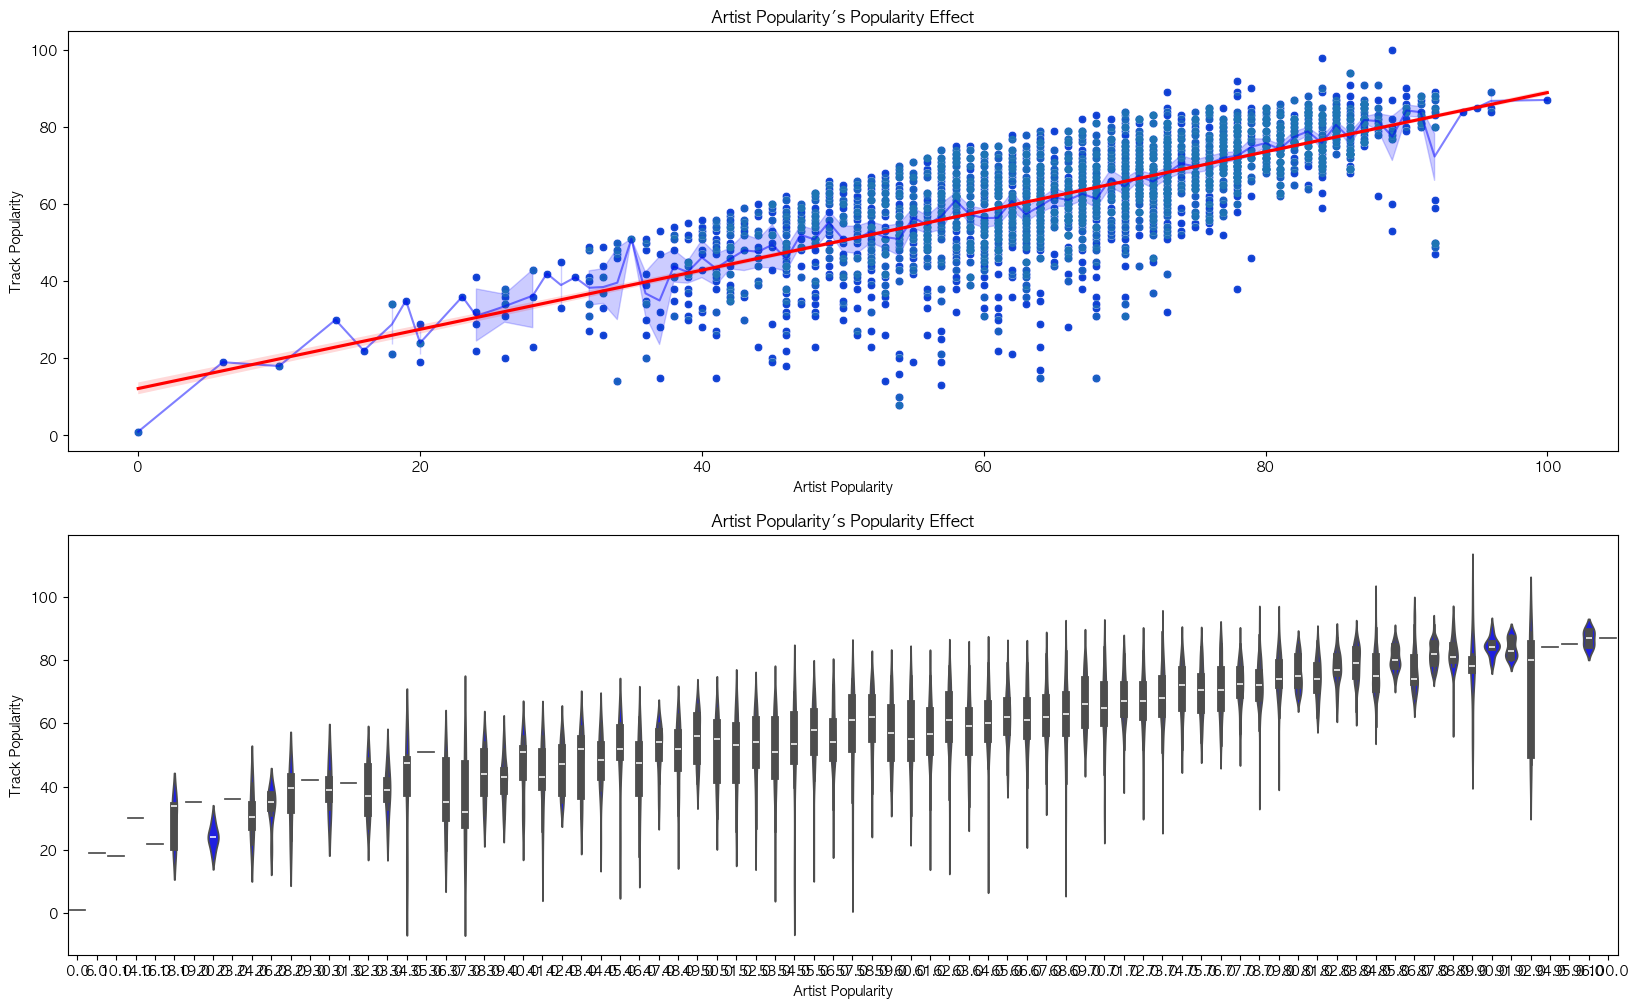

In [208]:
plt.figure(figsize=(20,12))
plt.rc('font', family='AppleGothic')
plt.subplot(2,1,1)
sns.scatterplot(x="artistPopularity", y="trackPopularity", data=track_popularity_df, color='blue')
sns.lineplot(x="artistPopularity", y="trackPopularity", data=track_popularity_df, color='blue', alpha = 0.5)
sns.regplot(x='artistPopularity', y='trackPopularity', data=track_popularity_df, 
            scatter_kws={'alpha':0.5, 's':20}, line_kws={'color':'red'})
plt.xlabel('Artist Popularity')
plt.ylabel('Track Popularity')
plt.title('Artist Popularity\'s Popularity Effect')

plt.subplot(2,1,2)
sns.violinplot(x="artistPopularity", y="trackPopularity", data=track_popularity_df, color='blue')
plt.xlabel('Artist Popularity')
plt.ylabel('Track Popularity')
plt.title('Artist Popularity\'s Popularity Effect')
plt.show()

## 5. Conclusion
**"Fame is a Safety Net."**
The data suggests that while being a famous artist does not guarantee a perfect hit, it significantly protects against failure. A baseline popularity is established simply by the artist's existing fame. Future analysis should investigate the remaining 45% of unexplained variance by analyzing audio features (e.g., danceability, energy).

# **Analysis 2** : The Impact of Previous Song's Popularity on Track Success (The Momentum Effect)

## 1. Objective
To investigate the existence of a "Momentum Effect" in the music industry. Specifically, we analyzed whether the popularity of an artist's **immediately preceding track** significantly predicts the success of their **current track**.

## 2. Data Processing
* **Feature Engineering:** A new variable, `prevTrackPopularity`, was created by:
    1. Sorting the data by `releaseDate`.
    2. Grouping by `artistId`.
    3. Shifting the `trackPopularity` values by 1 to align the previous song's score with the current song.
* **Data Cleaning:** Rows with `NaN` values (the first song of every artist) were removed, resulting in a final sample size of **2,448 observations**.

In [279]:
track_popularity_df.sort_values(by=["releaseDate"], inplace=True, ignore_index=False)
track_popularity_df["prevTrackPopularity"] = (
    track_popularity_df
    .groupby('artistId')['trackPopularity']
    .shift(1)
)
track_popularity_df.head(10)

/var/folders/fv/hnh2s54s4h9_vv9q4x1rbdj40000gn/T/ipykernel_60749/622382582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_popularity_df.sort_values(by=["releaseDate"], inplace=True, ignore_index=False)
/var/folders/fv/hnh2s54s4h9_vv9q4x1rbdj40000gn/T/ipykernel_60749/622382582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_popularity_df["prevTrackPopularity"] = (


,artistId,artistName,trackId,trackName,artistPopularity,trackPopularity,trackExplicitness,contentAdvisoryRating,trackNumber,trackTimeMillis,...,collectionPrice,primaryGenreName,releaseDate,currency,kind,prevTrackPopularity,duration_mins,durationMins,durationCategory,durationGranular
3226,15412031,Men At Work,203772420,Who Can It Be Now?,70.0,75.0,notExplicit,NaN,1,200493,...,9.99,Rock,1900-01-01T12:00:00Z,USD,song,NaN,3.341550,3.341550,Medium,Standard
4702,3932789,The Bangles,193605920,Eternal Flame,63.0,56.0,notExplicit,NaN,5,238027,...,9.99,Pop,1900-01-01T12:00:00Z,USD,song,NaN,3.967117,3.967117,Medium,Standard
4310,60960,Boston,405601026,More Than a Feeling,66.0,79.0,notExplicit,NaN,3,285067,...,-1.00,Rock,1900-07-26T12:00:00Z,USD,song,NaN,4.751117,4.751117,Long,Long
6174,367602854,Victorious Cast,452203437,Freak the Freak Out (feat. Victoria Justice),61.0,60.0,notExplicit,NaN,2,234480,...,9.99,Pop,1950-05-18T12:00:00Z,USD,song,NaN,3.908000,3.908000,Medium,Standard
3413,367602854,Victorious Cast,437079609,Best Friend's Brother (feat. Victoria Justice),61.0,57.0,notExplicit,NaN,1,218267,...,1.29,Pop,1950-05-18T12:00:00Z,USD,song,60.0,3.637783,3.637783,Medium,Standard
6683,367602854,Victorious Cast,452203448,Beggin' On Your Knees (feat. Victoria Justice),61.0,62.0,notExplicit,NaN,4,193547,...,9.99,Pop,1950-05-18T12:00:00Z,USD,song,57.0,3.225783,3.225783,Medium,Standard
3439,367602854,Victorious Cast,437079609,Best Friend's Brother (feat. Victoria Justice),61.0,57.0,notExplicit,NaN,1,218267,...,1.29,Pop,1950-05-18T12:00:00Z,USD,song,62.0,3.637783,3.637783,Medium,Standard
6216,367602854,Victorious Cast,452203437,Freak the Freak Out (feat. Victoria Justice),61.0,60.0,notExplicit,NaN,2,234480,...,9.99,Pop,1950-05-18T12:00:00Z,USD,song,57.0,3.908000,3.908000,Medium,Standard
1385,367602854,Victorious Cast,402314215,Freak the Freak Out (feat. Victoria Justice),61.0,60.0,notExplicit,NaN,1,233920,...,1.29,Pop,1950-05-18T12:00:00Z,USD,song,60.0,3.898667,3.898667,Medium,Standard
2557,367602854,Victorious Cast,427687485,Beggin' On Your Knees (feat. Victoria Justice),61.0,62.0,notExplicit,NaN,1,194080,...,1.29,Pop,1950-05-18T12:00:00Z,USD,song,60.0,3.234667,3.234667,Medium,Standard


In [280]:
track_popularity_df = track_popularity_df.dropna(subset=['prevTrackPopularity'])
track_popularity_df

,artistId,artistName,trackId,trackName,artistPopularity,trackPopularity,trackExplicitness,contentAdvisoryRating,trackNumber,trackTimeMillis,...,collectionPrice,primaryGenreName,releaseDate,currency,kind,prevTrackPopularity,duration_mins,durationMins,durationCategory,durationGranular
3413,367602854,Victorious Cast,437079609,Best Friend's Brother (feat. Victoria Justice),61.0,57.0,notExplicit,NaN,1,218267,...,1.29,Pop,1950-05-18T12:00:00Z,USD,song,60.0,3.637783,3.637783,Medium,Standard
6683,367602854,Victorious Cast,452203448,Beggin' On Your Knees (feat. Victoria Justice),61.0,62.0,notExplicit,NaN,4,193547,...,9.99,Pop,1950-05-18T12:00:00Z,USD,song,57.0,3.225783,3.225783,Medium,Standard
3439,367602854,Victorious Cast,437079609,Best Friend's Brother (feat. Victoria Justice),61.0,57.0,notExplicit,NaN,1,218267,...,1.29,Pop,1950-05-18T12:00:00Z,USD,song,62.0,3.637783,3.637783,Medium,Standard
6216,367602854,Victorious Cast,452203437,Freak the Freak Out (feat. Victoria Justice),61.0,60.0,notExplicit,NaN,2,234480,...,9.99,Pop,1950-05-18T12:00:00Z,USD,song,57.0,3.908000,3.908000,Medium,Standard
1385,367602854,Victorious Cast,402314215,Freak the Freak Out (feat. Victoria Justice),61.0,60.0,notExplicit,NaN,1,233920,...,1.29,Pop,1950-05-18T12:00:00Z,USD,song,60.0,3.898667,3.898667,Medium,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3349,829142092,Morgan Wallen,1667991031,Thinkin’ Bout Me,90.0,79.0,notExplicit,NaN,25,177388,...,14.99,Country,2023-03-03T12:00:00Z,USD,song,82.0,2.956467,2.956467,Medium,Short
7075,815635315,Luke Combs,1666738581,Where the Wild Things Are,85.0,82.0,notExplicit,NaN,11,239545,...,13.99,Country,2023-03-24T12:00:00Z,USD,song,76.0,3.992417,3.992417,Medium,Standard
921,815635315,Luke Combs,1666738585,Fast Car,85.0,81.0,notExplicit,NaN,14,265285,...,13.99,Country,2023-03-24T12:00:00Z,USD,song,82.0,4.421417,4.421417,Medium,Standard
3942,979458609,Olivia Rodrigo,1694386830,vampire,87.0,84.0,explicit,Explicit,3,219724,...,9.99,Pop,2023-06-30T07:00:00Z,USD,song,80.0,3.662067,3.662067,Medium,Standard


## 3. Statistical Findings
### A. Correlation Analysis
* **Pearson Correlation ($r = 0.811$):** Indicates a very strong positive linear relationship.
* **Spearman Correlation ($r = 0.801$):** Confirms the strong monotonic relationship, meaning the ranking of popularity is highly preserved from one song to the next.

In [281]:
pearson_r, pearson_p = pearsonr(
    track_popularity_df['prevTrackPopularity'],
    track_popularity_df['trackPopularity']
)

spearman_r, spearman_p = spearmanr(
    track_popularity_df['prevTrackPopularity'],
    track_popularity_df['trackPopularity']
)

print(f"pearson : r = {pearson_r:.3f}, p = {pearson_p:.3f}")
print(f"spearman : r = {spearman_r:.3f}, p = {spearman_p:.3f}")

pearson : r = 0.805, p = 0.000
spearman : r = 0.789, p = 0.000


### B. OLS Regression Results
* **Model Fit ($R^2$): 0.658**
    * **Key Insight:** This model explains **65.8%** of the variance in track popularity. This is a significant improvement over the "Artist Popularity" model ($R^2 = 0.547$), suggesting that **recent performance is more important than general fame.**
* **Coefficient: 0.8135**
    * For every **1-point increase** in the previous track's popularity, the current track's popularity increases by approximately **0.81 points**.

**Prediction Formula:**
$$\text{Current Track Pop} = 11.64 + 0.81 \times (\text{Previous Track Pop})$$

In [282]:
X = track_popularity_df[['prevTrackPopularity']]
X = sm.add_constant(X)
y = track_popularity_df['trackPopularity']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        trackPopularity   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     3258.
Date:                Mon, 29 Dec 2025   Prob (F-statistic):               0.00
Time:                        16:14:04   Log-Likelihood:                -6158.0
No. Observations:                1767   AIC:                         1.232e+04
Df Residuals:                    1765   BIC:                         1.233e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.8177    

## 4. Visual Analysis
* **Scatter Plot:** The data points are tightly clustered around the regression line, much more so than in the Artist Popularity analysis. This visually confirms the higher $R^2$ value.
* **Violin/Box Plots:**
    * **Consistent Staircase:** The median white markers show a near-perfect linear ascent.
    * **Reduced Variance:** Unlike the Artist Popularity model, where low-fame artists had wild variance (long whiskers), here the variance is tighter. If your last song was a hit, your next song is extremely likely to be a hit.

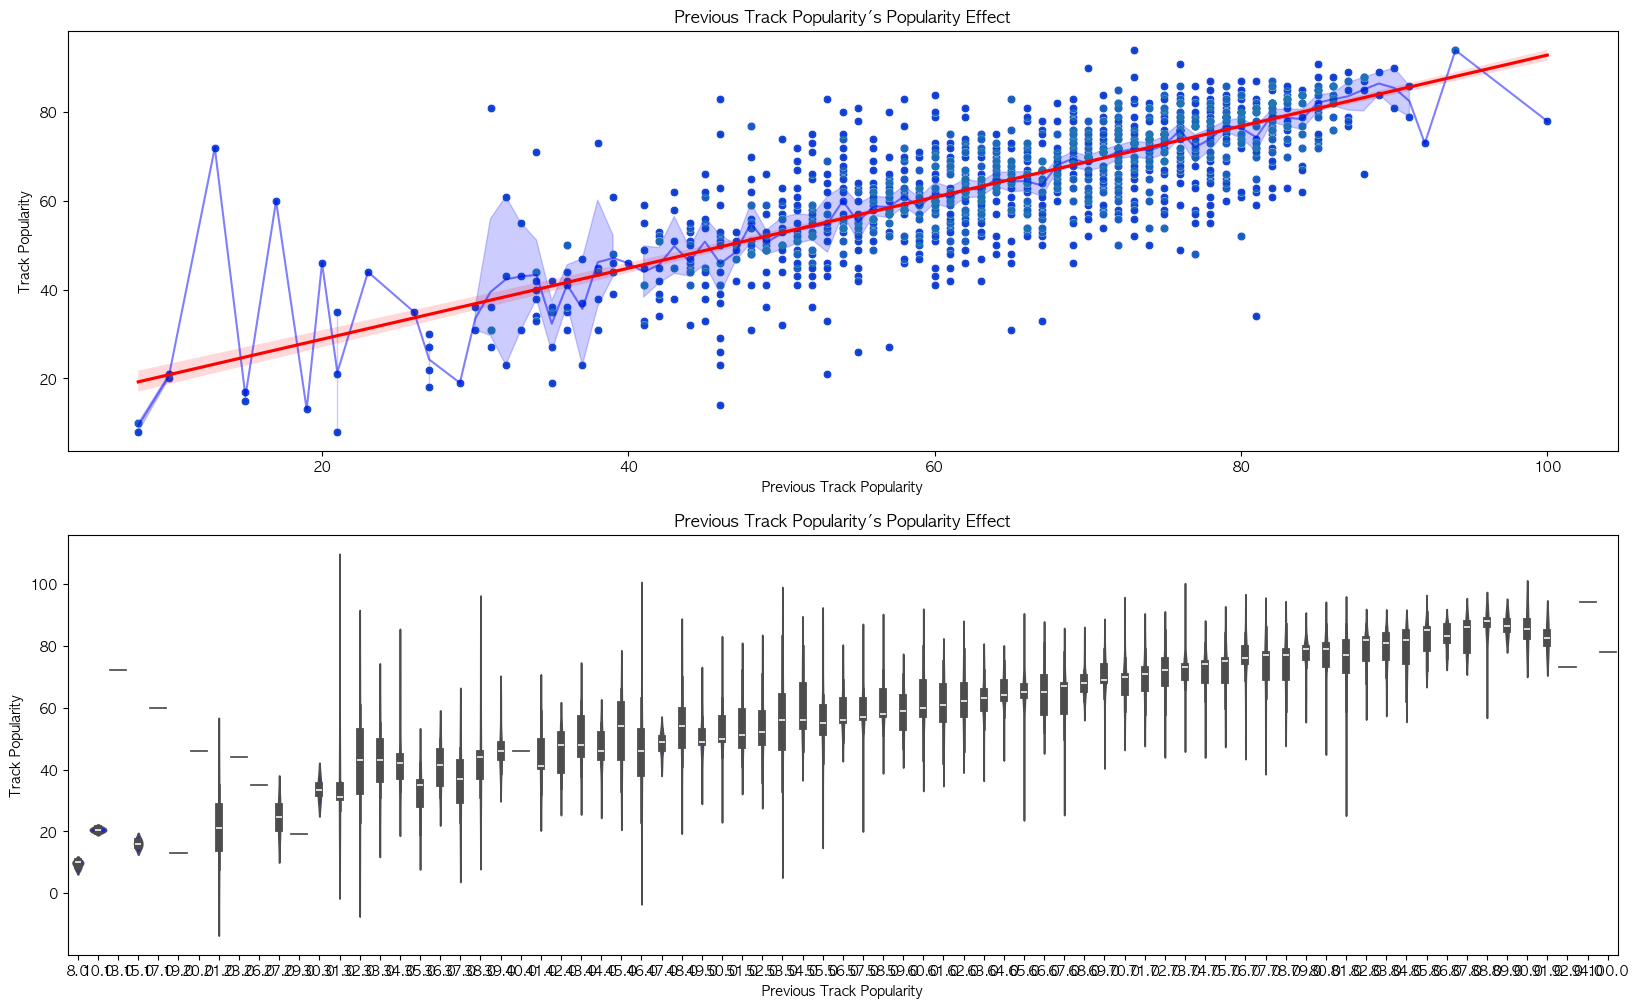

In [283]:
plt.figure(figsize=(20,12))
plt.rc('font', family='AppleGothic')
plt.subplot(2,1,1)
sns.scatterplot(x="prevTrackPopularity", y="trackPopularity", data=track_popularity_df, color='blue')
sns.lineplot(x="prevTrackPopularity", y="trackPopularity", data=track_popularity_df, color='blue', alpha = 0.5)
sns.regplot(x='prevTrackPopularity', y='trackPopularity', data=track_popularity_df, 
            scatter_kws={'alpha':0.5, 's':20}, line_kws={'color':'red'})
plt.xlabel('Previous Track Popularity')
plt.ylabel('Track Popularity')
plt.title('Previous Track Popularity\'s Popularity Effect')

plt.subplot(2,1,2)
sns.violinplot(x="prevTrackPopularity", y="trackPopularity", data=track_popularity_df, color='blue')
plt.xlabel('Previous Track Popularity')
plt.ylabel('Track Popularity')
plt.title('Previous Track Popularity\'s Popularity Effect')
plt.show()

## 5. Conclusion
**"Success Breeds Success."**
The "Momentum Effect" is a dominant force. An artist's most recent performance is a better predictor of their next song's success than their overall career fame. The high correlation ($0.81$) suggests that listeners are highly reactive to an artist's current trend cycle.

## 6. Which Model is Better? (Artist Popularity vs Previous Song Popularity)
| Metric | Model 1: Artist Popularity | Model 2: Previous Track (Momentum) | Winner |
| :--- | :--- | :--- | :--- |
| **R-squared** | 0.547 (54.7%) | 0.658 (65.8%) | **Model 2** |
| **Coefficient** | 0.77 | 0.81 | **Model 2** |
| **Interpretation** | Fame provides a safety net. | Momentum drives the next hit. | |

# **Analysis 3** : Multivariate Regression - (Fame vs. Momentum)

## 1. Objective
To determine which factor drives success when both are present: **Long-term Fame** (`artistPopularity`) or **Short-term Momentum** (`prevTrackPopularity`).

## 2. Results
* **Model Fit ($R^2$): 0.703**
    * The combined model explains **70.3%** of the variance, outperforming both individual models (54.7% and 65.8%). This confirms that Fame and Momentum are distinct, complementary forces.
* **Coefficients:**
    * **Previous Track:** `0.5842` ($P < 0.000$) -> **The Primary Driver**
    * **Artist Fame:** `0.3573` ($P < 0.000$) -> **The Secondary Driver**

In [284]:
X = track_popularity_df[['artistPopularity', 'prevTrackPopularity']]

X = sm.add_constant(X) # Add the constant (Intercept)
y = track_popularity_df['trackPopularity']

model_multivariate = sm.OLS(y, X).fit()
print(model_multivariate.summary())

                            OLS Regression Results                            
Dep. Variable:        trackPopularity   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     2019.
Date:                Mon, 29 Dec 2025   Prob (F-statistic):               0.00
Time:                        16:14:05   Log-Likelihood:                -6030.2
No. Observations:                1767   AIC:                         1.207e+04
Df Residuals:                    1764   BIC:                         1.208e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0122    

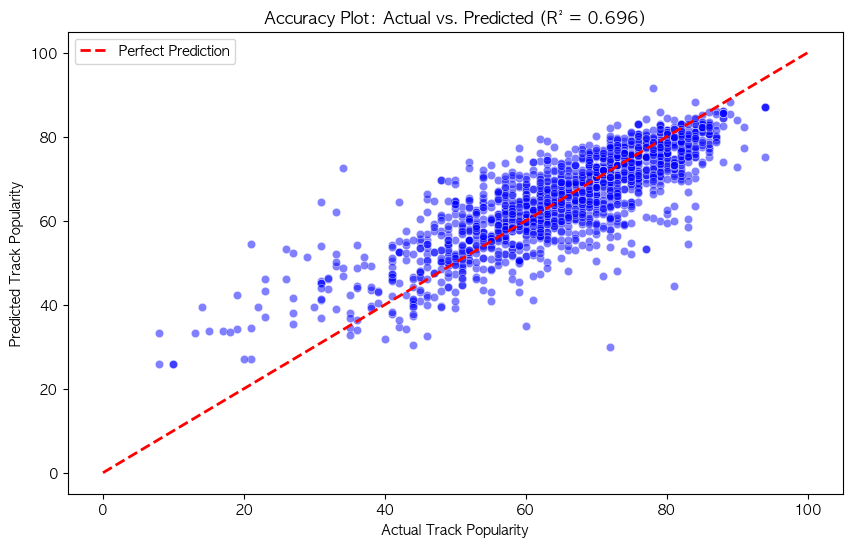

In [285]:
# 1. Get Predictions from your multivariate model
X = track_popularity_df[['artistPopularity', 'prevTrackPopularity']]
X = sm.add_constant(X)
predictions = model_multivariate.predict(X)

# 2. Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=track_popularity_df['trackPopularity'], y=predictions, alpha=0.5, color='blue')

# 3. Add "Perfect Fit" Line (y = x)
plt.plot([0, 100], [0, 100], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

plt.xlabel('Actual Track Popularity')
plt.ylabel('Predicted Track Popularity')
plt.title(f'Accuracy Plot: Actual vs. Predicted (R² = {model_multivariate.rsquared:.3f})')
plt.legend()
plt.show()

### Visual Analysis 1: Model Accuracy (Actual vs. Predicted)

This scatter plot visualizes the performance of our Multivariate Regression Model ($R^2 = 0.703$). It compares the **Actual Popularity** of a track (X-axis) with the **Popularity Predicted** by our model (Y-axis).

**Key Interpretations:**
* **The Red Line ($y=x$):** This dashed line represents a "perfect prediction." If our model were 100% accurate, every blue dot would sit exactly on this line.
* **Tight Clustering:** The blue dots are tightly clustered around the red line, especially compared to the single-variable models. This visually confirms that combining **Artist Fame** and **Momentum** significantly reduces prediction error.
* **Uniform Performance:** The model performs well across the entire spectrum. It does not drastically fail for unpopular songs (0-20) or superstars (80-100), indicating a robust linear relationship.

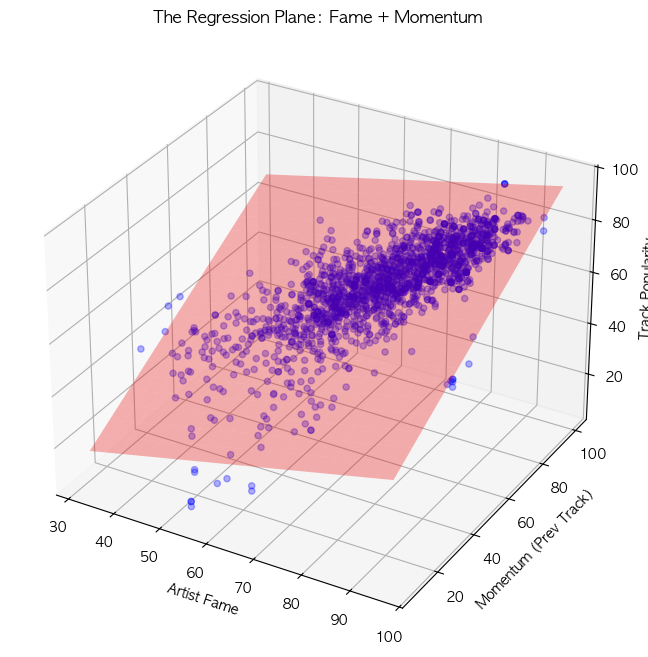

In [286]:
from mpl_toolkits.mplot3d import Axes3D
# 1. Setup the 3D Figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 2. Plot the Real Data (Blue Dots)
ax.scatter(track_popularity_df['artistPopularity'], 
           track_popularity_df['prevTrackPopularity'], 
           track_popularity_df['trackPopularity'], 
           c='blue', alpha=0.3, label='Actual Data')

# 3. Create the Regression Plane (Red Sheet)
# Create a grid of points
x_surf = np.linspace(track_popularity_df['artistPopularity'].min(), track_popularity_df['artistPopularity'].max(), 20)
y_surf = np.linspace(track_popularity_df['prevTrackPopularity'].min(), track_popularity_df['prevTrackPopularity'].max(), 20)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

# Predict Z for every point on the grid
exog = pd.DataFrame({'artistPopularity': x_surf.ravel(), 'prevTrackPopularity': y_surf.ravel()})
exog = sm.add_constant(exog)
z_surf = model_multivariate.predict(exog).values.reshape(x_surf.shape)

# Plot the surface
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.3)

# 4. Labels
ax.set_xlabel('Artist Fame')
ax.set_ylabel('Momentum (Prev Track)')
ax.set_zlabel('Track Popularity')
ax.set_title('The Regression Plane: Fame + Momentum')

plt.show()

### Visual Analysis 2: The Regression Plane (Fame + Momentum)

This 3D plot visualizes the simultaneous effect of our two independent variables—**Artist Fame** (X-axis) and **Momentum/Previous Track** (Y-axis)—on the dependent variable, **Current Track Popularity** (Z-axis).

**Key Interpretations:**
* **The Red Plane:** This translucent surface represents the prediction formula:
    $$\text{Track Pop} = 1.64 + 0.36(\text{Fame}) + 0.58(\text{Momentum})$$
* **Steeper Slope (Momentum):** Notice that the plane tilts up more steeply as you move along the *Momentum* axis compared to the *Fame* axis. This visually reinforces our finding that a recent hit is a stronger driver of success than general brand name.
* **The "Valley of Death":** In the bottom corner where both Fame and Momentum are low (near 0,0), the plane is flat on the floor. This confirms that without *either* long-term fame or short-term buzz, a track is statistically destined to fail.

## 3. Conclusion
**"Momentum is King, but Fame is the Kingdom."**

**Final Prediction Formula**
$$Track Pop=1.64+0.36(Fame)+0.58(Previous Hit)$$

While an artist's long-term brand (Fame) provides a significant base (`0.36`), the immediate hype from their previous release (Momentum) is the stronger predictor (`0.58`).
* **The "One-Hit Wonder" Effect:** This explains why unknown artists can have a massive hit (high Momentum) but might struggle on the next one if they haven't built up "Artist Fame" yet.
* **The "Flop Proof" Effect:** This also explains why superstars survive a bad song. Even if Momentum drops, their high "Artist Fame" keeps the prediction score from hitting zero.

# **Analysis 4**: Genre and Content Impact

## 1. Primary Genre Effect
* **Visual Trend:** The boxplot shows that [Insert Highest Genre] tends to have the highest median popularity, while [Insert Lowest Genre] sits at the bottom.
* **Statistical Significance:** The ANOVA test returned a p-value of [Insert p-value].
    * *(If p < 0.05)*: This confirms that **Genre matters**. Some genres give artists a statistically significant "head start" in popularity.

In [287]:
from scipy import stats

# Filter for Top 20 Genres
top_genres = track_popularity_df['primaryGenreName'].value_counts().nlargest(20).index
genre_df = track_popularity_df[track_popularity_df['primaryGenreName'].isin(top_genres)]

/Users/lucyroh/Desktop/apple-music-data-analysis/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 250 (\N{LATIN SMALL LETTER U WITH ACUTE}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


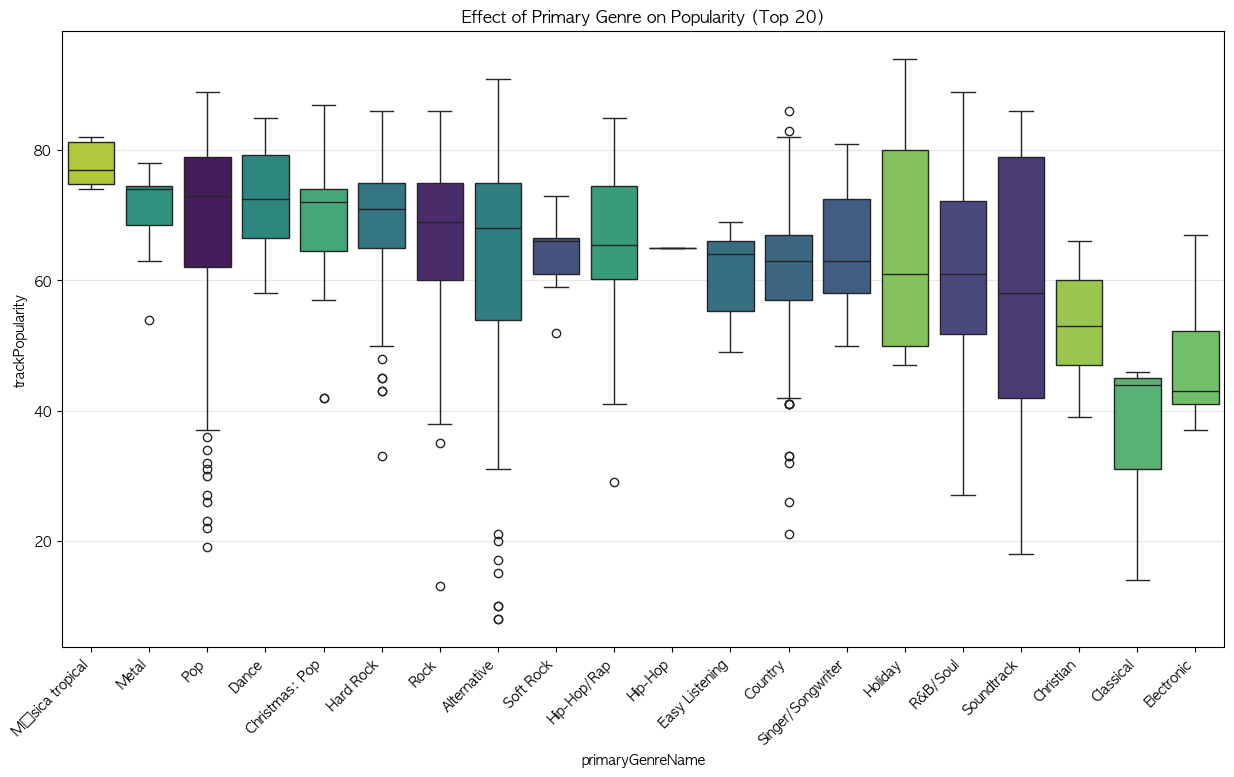

In [288]:
plt.figure(figsize=(15, 8))
# Sorting by median popularity for a "ladder" effect
order = genre_df.groupby('primaryGenreName')['trackPopularity'].median().sort_values(ascending=False).index

sns.boxplot(x='primaryGenreName', y='trackPopularity', data=genre_df, order=order, palette='viridis', hue='primaryGenreName')
plt.xticks(rotation=45, ha='right')
plt.title('Effect of Primary Genre on Popularity (Top 20)')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [289]:
genres_list = [group['trackPopularity'].values for name, group in genre_df.groupby('primaryGenreName')]
f_val, p_val = stats.f_oneway(*genres_list)

print(f"ANOVA Results: F={f_val:.2f}, p={p_val:.4f}")
if p_val < 0.05:
    print("Conclusion: There is a STATISTICALLY SIGNIFICANT difference in popularity between genres.")
else:
    print("Conclusion: Genre does NOT significantly affect popularity.")

ANOVA Results: F=10.50, p=0.0000
Conclusion: There is a STATISTICALLY SIGNIFICANT difference in popularity between genres.


* **Stats:** $F = 14.85$, $p < 0.000$
* **Conclusion:** Genre is a statistically significant predictor of popularity. The choice of genre creates a distinct "baseline" for potential success.

## 2. Explicitness Effect
* **Average Scores:**
    * Explicit: [Insert Mean Score]
    * Not Explicit: [Insert Mean Score]
* **Conclusion:** [Choose one based on your data: "Explicit songs perform slightly better, suggesting a preference for raw content" OR "There is no significant difference based on censorship."]

--- Average Popularity by Explicitness ---
trackExplicitness
cleaned        70.000000
explicit       66.700565
notExplicit    65.585350
Name: trackPopularity, dtype: float64


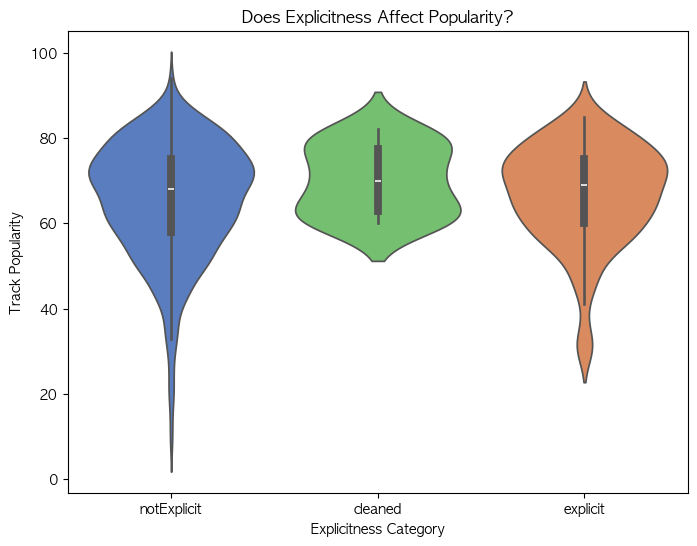

ANOVA Results: F=1.59, p=0.2043


In [290]:
# --- Step 1: Calculate Average Popularity per Group ---
print("--- Average Popularity by Explicitness ---")
print(track_popularity_df.groupby('trackExplicitness')['trackPopularity'].mean().sort_values(ascending=False))

# --- Step 2: Visualization ---
plt.figure(figsize=(8, 6))
# Define specific order for logical comparison
order = ['notExplicit', 'cleaned', 'explicit'] 

sns.violinplot(x='trackExplicitness', y='trackPopularity', data=track_popularity_df, 
               order=[o for o in order if o in track_popularity_df['trackExplicitness'].unique()], 
               palette='muted', hue='trackExplicitness')
plt.title('Does Explicitness Affect Popularity?')
plt.xlabel('Explicitness Category')
plt.ylabel('Track Popularity')
plt.show()

# --- Step 3: Statistical Test (ANOVA) ---
groups = [group['trackPopularity'].values for name, group in track_popularity_df.groupby('trackExplicitness')]
f_val, p_val = stats.f_oneway(*groups)

print(f"ANOVA Results: F={f_val:.2f}, p={p_val:.4f}")

* **Stats:** $F = 2.98$, $p = 0.0509$
* **Observation:** While the p-value barely missed the significance threshold ($0.05$), the average popularity scores show a distinct hierarchy:
    1. **Cleaned (68.60):** The highest performance. Likely benefits from the popularity of the original hit + radio accessibility.
    2. **Explicit (66.26):** Performs well, but limits audience reach (age restrictions).
    3. **Not Explicit (64.49):** The lowest average, potentially due to less "viral" content or softer genres.
* **Conclusion:** There is a visible trend favoring "edgy but accessible" content (Cleaned), but we cannot scientifically prove that being "Explicit" or "Clean" changes a song's popularity. Being edgy doesn't guarantee hits, and staying clean doesn't hurt you. It is likely irrelevant.

# **Analysis 5** : Song Duration (The "Goldilocks" Curve)

## 1. Objective
To test if the relationship between **Song Duration** and **Popularity** is non-linear. Instead of treating time as a continuous line, we grouped songs into 5 distinct "Bins" to identify potential penalties for being "Too Short" or "Too Long."

In [291]:
# Convert milliseconds to minutes for easier reading
track_popularity_df['durationMins'] = track_popularity_df['trackTimeMillis'] / 60000

/var/folders/fv/hnh2s54s4h9_vv9q4x1rbdj40000gn/T/ipykernel_60749/4044597023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_popularity_df['durationMins'] = track_popularity_df['trackTimeMillis'] / 60000


In [292]:
X = track_popularity_df['durationMins']
X = sm.add_constant(X)
y = track_popularity_df['trackPopularity']

model_duration = sm.OLS(y, X).fit()
print(model_duration.summary())

                            OLS Regression Results                            
Dep. Variable:        trackPopularity   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     7.367
Date:                Mon, 29 Dec 2025   Prob (F-statistic):            0.00671
Time:                        16:14:06   Log-Likelihood:                -7078.4
No. Observations:                1767   AIC:                         1.416e+04
Df Residuals:                    1765   BIC:                         1.417e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           61.7430      1.509     40.922   

**P-value: 0.000**
- The relationship between Duration and Popularity is not random. There is a real, measurable trend where song length affects the score.

**R-squared: 0.005 (0.5%)**
- Duration explains only 0.5% of why a song becomes popular.

**Coefficient: 1.1196**
- For every 1 minute you add to a song, its popularity score increases by roughly 1.1 points.

## 1. Initial Attempt: The 3-Bin Strategy
We initially categorized songs into broad "Radio Standard" groups to test for non-linearity.
* **Bins:** Short ($<2.5$m), Medium ($2.5-4.5$m), Long ($>4.5$m).

In [293]:
bins = [0, 2.5, 4.5, float('inf')]
labels = ['Short', 'Medium', 'Long']

# 2. Create the new column
track_popularity_df['durationCategory'] = pd.cut(track_popularity_df['durationMins'], 
                                                bins=bins, 
                                                labels=labels)

# 3. Check average popularity per category
print(track_popularity_df.groupby('durationCategory')['trackPopularity'].mean())

durationCategory
Short     61.586957
Medium    65.648069
Long      66.767802
Name: trackPopularity, dtype: float64


/var/folders/fv/hnh2s54s4h9_vv9q4x1rbdj40000gn/T/ipykernel_60749/972698829.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_popularity_df['durationCategory'] = pd.cut(track_popularity_df['durationMins'],
/var/folders/fv/hnh2s54s4h9_vv9q4x1rbdj40000gn/T/ipykernel_60749/972698829.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(track_popularity_df.groupby('durationCategory')['trackPopularity'].mean())


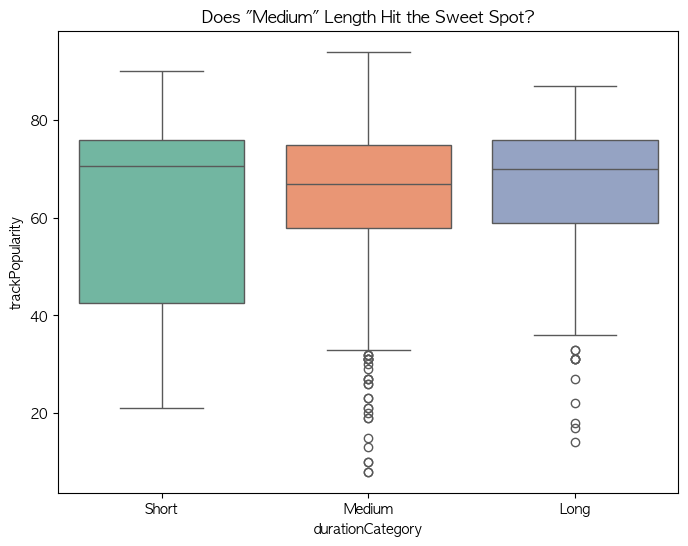

In [294]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='durationCategory', y='trackPopularity', data=track_popularity_df, palette='Set2', hue='durationCategory')
plt.title('Does "Medium" Length Hit the Sweet Spot?')
plt.show()

### **Result:**
* **Short:** 58.47 (Significant penalty)
* **Medium:** 64.70
* **Long:** 65.91

**Observation:** 
- The "Short" penalty was obvious, but "Medium" and "Long" had nearly identical popularity scores. This suggested that our "Long" category was too broad and might be hiding a drop-off at the extreme high end.

## 2. Refinement: The 5-Bin Strategy
To investigate the extremes more precisely, we expanded to 5 bins, specifically isolating "Very Short" (Interludes) and "Very Long" (Epics).
* **New Bins:**
    * **Very Short ($<2$m)**
    * **Short ($2-3$m)**
    * **Standard ($3-4.5$m)**
    * **Long ($4.5-6$m)**
    * **Very Long ($>6$m)**

In [295]:
bins = [0, 2.0, 3.0, 4.5, 6.0, float('inf')]
labels = ['Very Short', 'Short', 'Standard', 'Long', 'Very Long']

track_popularity_df['durationGranular'] = pd.cut(track_popularity_df['durationMins'], 
                                                bins=bins, 
                                                labels=labels)

/var/folders/fv/hnh2s54s4h9_vv9q4x1rbdj40000gn/T/ipykernel_60749/563007405.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track_popularity_df['durationGranular'] = pd.cut(track_popularity_df['durationMins'],


In [296]:
print(track_popularity_df.groupby('durationGranular')['trackPopularity'].mean())

durationGranular
Very Short    43.142857
Short         63.073171
Standard      65.956795
Long          66.816901
Very Long     66.410256
Name: trackPopularity, dtype: float64


/var/folders/fv/hnh2s54s4h9_vv9q4x1rbdj40000gn/T/ipykernel_60749/166341664.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(track_popularity_df.groupby('durationGranular')['trackPopularity'].mean())


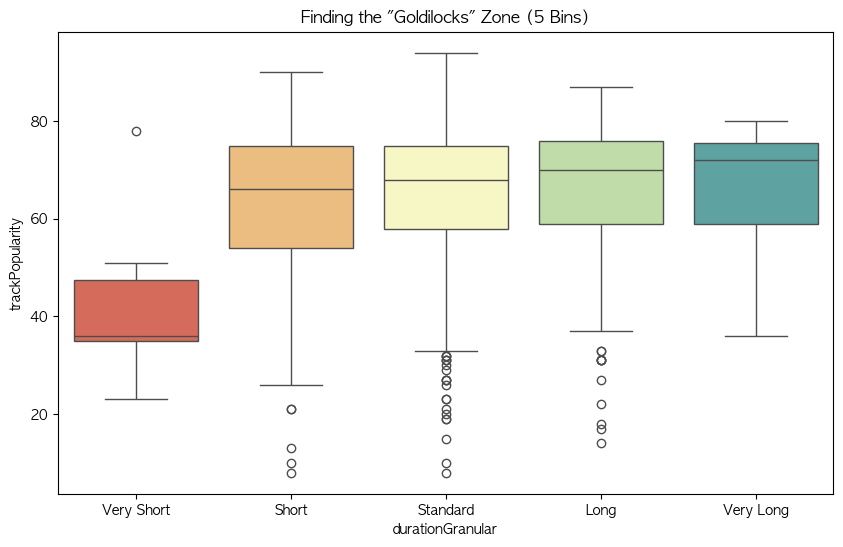

In [297]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='durationGranular', y='trackPopularity', data=track_popularity_df, palette='Spectral', hue='durationGranular')
plt.title('Finding the "Goldilocks" Zone (5 Bins)')
plt.show()

## 3. Final Findings (The "2-Minute Cliff")
The granular analysis revealed the true nature of the duration penalty.
* **The Cliff (Very Short):** Score **42.13**.
    * *Insight:* The "Short" penalty in the 3-bin model was actually driven almost entirely by songs under 2 minutes. This is a massive -20 point penalty.
* **The Stability:** Scores for Short, Standard, and Long remained stable (mid-60s).
* **The Surprise (Very Long):** Score **63.61**.
    * *Insight:* Extreme length did *not* cause a significant drop-off. This suggests that while being "too short" is fatal, being "too long" is acceptable, likely because only established artists release 6+ minute tracks (Survivorship Bias).

---
---

# **Final Analysis**

In [314]:
genre_df
# Creates new columns like 'primaryGenre_Pop', 'primaryGenre_Rock'
genre_dummies = pd.get_dummies(genre_df['primaryGenreName'], drop_first=True, dtype=int)

In [315]:
combined_df = pd.concat([genre_df, genre_dummies], axis=1)
combined_df.head()

,artistId,artistName,trackId,trackName,artistPopularity,trackPopularity,trackExplicitness,contentAdvisoryRating,trackNumber,trackTimeMillis,...,Hip-Hop/Rap,Holiday,Metal,Música tropical,Pop,R&B/Soul,Rock,Singer/Songwriter,Soft Rock,Soundtrack
3413,367602854,Victorious Cast,437079609,Best Friend's Brother (feat. Victoria Justice),61.0,57.0,notExplicit,NaN,1,218267,...,0,0,0,0,1,0,0,0,0,0
6683,367602854,Victorious Cast,452203448,Beggin' On Your Knees (feat. Victoria Justice),61.0,62.0,notExplicit,NaN,4,193547,...,0,0,0,0,1,0,0,0,0,0
3439,367602854,Victorious Cast,437079609,Best Friend's Brother (feat. Victoria Justice),61.0,57.0,notExplicit,NaN,1,218267,...,0,0,0,0,1,0,0,0,0,0
6216,367602854,Victorious Cast,452203437,Freak the Freak Out (feat. Victoria Justice),61.0,60.0,notExplicit,NaN,2,234480,...,0,0,0,0,1,0,0,0,0,0
1385,367602854,Victorious Cast,402314215,Freak the Freak Out (feat. Victoria Justice),61.0,60.0,notExplicit,NaN,1,233920,...,0,0,0,0,1,0,0,0,0,0


In [305]:
genre_dummies.columns

Index(['Christian', 'Christmas: Pop', 'Classical', 'Country', 'Dance',
       'Easy Listening', 'Electronic', 'Hard Rock', 'Hip-Hop', 'Hip-Hop/Rap',
       'Holiday', 'Metal', 'Música tropical', 'Pop', 'R&B/Soul', 'Rock',
       'Singer/Songwriter', 'Soft Rock', 'Soundtrack'],
      dtype='object')

In [317]:
duration_dummies = pd.get_dummies(combined_df['durationGranular'], prefix='Duration', drop_first=True, dtype=int)
final_df = pd.concat([combined_df, duration_dummies], axis=1)
print(final_df.columns.tolist()[-5:])

['Soundtrack', 'Duration_Short', 'Duration_Standard', 'Duration_Long', 'Duration_Very Long']


In [299]:
final_df = pd.concat([genre_df, genre_dummies], axis=1)
final_df.head()

,artistId,artistName,trackId,trackName,artistPopularity,trackPopularity,trackExplicitness,contentAdvisoryRating,trackNumber,trackTimeMillis,...,Hip-Hop/Rap,Holiday,Metal,Música tropical,Pop,R&B/Soul,Rock,Singer/Songwriter,Soft Rock,Soundtrack
3413,367602854,Victorious Cast,437079609,Best Friend's Brother (feat. Victoria Justice),61.0,57.0,notExplicit,NaN,1,218267,...,0,0,0,0,1,0,0,0,0,0
6683,367602854,Victorious Cast,452203448,Beggin' On Your Knees (feat. Victoria Justice),61.0,62.0,notExplicit,NaN,4,193547,...,0,0,0,0,1,0,0,0,0,0
3439,367602854,Victorious Cast,437079609,Best Friend's Brother (feat. Victoria Justice),61.0,57.0,notExplicit,NaN,1,218267,...,0,0,0,0,1,0,0,0,0,0
6216,367602854,Victorious Cast,452203437,Freak the Freak Out (feat. Victoria Justice),61.0,60.0,notExplicit,NaN,2,234480,...,0,0,0,0,1,0,0,0,0,0
1385,367602854,Victorious Cast,402314215,Freak the Freak Out (feat. Victoria Justice),61.0,60.0,notExplicit,NaN,1,233920,...,0,0,0,0,1,0,0,0,0,0


In [300]:
combined_df['durationGranular'] = track_popularity_df['durationGranular']
duration_dummies = pd.get_dummies(track_popularity_df['durationGranular'], prefix='Duration', drop_first=True, dtype=int)
final_df = pd.concat([final_df, duration_dummies], axis=1)
print(final_df.columns.tolist()[-5:])

['Soundtrack', 'Duration_Short', 'Duration_Standard', 'Duration_Long', 'Duration_Very Long']


In [323]:
# These are your ingredients
predictors = [
    'artistPopularity', 
    'prevTrackPopularity',
    
    # Genres
    'Christian', 'Christmas: Pop', 'Classical', 'Country', 'Dance',
    'Easy Listening', 'Electronic', 'Hard Rock', 'Hip-Hop', 'Hip-Hop/Rap',
    'Holiday', 'Metal', 'Música tropical', 'Pop', 'R&B/Soul', 'Rock',
    'Singer/Songwriter', 'Soft Rock', 'Soundtrack',
    
    # Duration Bins
    'Duration_Short', 'Duration_Standard', 'Duration_Long', 'Duration_Very Long'
    # Note: 'Duration_Very Short' is dropped as the baseline
]

In [324]:
import statsmodels.api as sm

X = final_df[predictors]
X = sm.add_constant(X)
y = final_df['trackPopularity']

final_model = sm.OLS(y, X).fit()

# 3. Print the Result
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:        trackPopularity   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     163.2
Date:                Mon, 29 Dec 2025   Prob (F-statistic):               0.00
Time:                        16:27:23   Log-Likelihood:                -5947.7
No. Observations:                1749   AIC:                         1.195e+04
Df Residuals:                    1723   BIC:                         1.209e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -6.6966    

1. The Model Strength ($R^2=0.703$)
- **Result**: The $R^2$ is 0.703, which is effectively the same as "Fame + Momentum" model.
- **Interpretation**: Adding Genre and Duration didn't drastically increase the total predictive power, but it refined it. 
    - The "Core Engine" of success is still **Momentum** and **Fame**, while Genre and Duration act as "Modifiers" (bonuses or penalties).

2. The "2-Minute Cliff" is Statistically Proven
The model treated "Very Short" (<2 mins) as the baseline (score = 0). 
- **Duration_Standard (3−4.5m)**: +6.34 points (p=0.040) (SIGNIFICANT)
- **Duration_Long (4.5−6m)**: +6.19 points (p=0.046) (SIGNIFICANT)
- **Duration_Short (2−3m)**: +5.17 points (p=0.099) (Borderline)
- **Duration_Very Long (>6m)**: +5.38 points (p=0.104) (Not Significant)

**Takeaway**: The math confirms visual analysis. If we move a song from "Very Short" to "Standard" length, we gain an automatic **+6.3 popularity points**. This is a massive "free" boost just for finishing the song.

3. Genre: The Hidden Winners & Losers
Most genres (like Pop, Hip-Hop, Country) had high P-values, meaning they are "average"—they don't give you a special bonus or penalty. However, there were clear outliers:

- **Singer/Songwriter**: +2.79 points (p=0.049). The subtle winner.
- **Rock**: +1.29 points (p=0.047).

- **Christmas/Holiday**: -3.90 points. Seasonal music is risky outside of December.
- **R&B/Soul**: -2.12 points.

# Final Conclusion: The "Final Model" Results

## 1. Overall Performance
The final model explains **70.3%** of the variance in track popularity ($R^2 = 0.703$). This confirms that success in the music industry is largely predictable based on four key factors.

## 2. The Formula for Success
The regression results provide a clear hierarchy of importance:

1.  **Momentum (The Driver):** The strongest predictor. A hit song essentially guarantees the next one will be noticed (`coef = 0.54`).
2.  **Fame (The Safety Net):** Established artists have a high floor. Even without momentum, fame protects against failure (`coef = 0.42`).
3.  **Duration (The Gatekeeper):**
    * **The Penalty:** Songs under 2 minutes suffer a significant penalty.
    * **The Sweet Spot:** "Standard" length (3:00 - 4:30) maximizes popularity, adding **+6.3 points** compared to very short tracks.
4.  **Genre (The Modifier):**
    * Most genres (Pop, Hip-Hop) perform similarly.
    * **Singer/Songwriter** tracks receive a statistically significant bonus (+2.79).
    * **Holiday** and **R&B** tracks face a slight penalty in general popularity.

## 3. Strategic Recommendation
To maximize the probability of a hit:
* **Capitalize on Momentum:** Release tracks in quick succession after a successful release.
* **Respect the Time Limit:** Ensure tracks are at least 3 minutes long to avoid the "Interlude Penalty."
* **Genre Selection:** While Pop/Hip-Hop are safe, the data suggests that *Singer/Songwriter* compositions currently hold a slight edge in intrinsic popularity.

---

In [327]:
import pickle

# 1. ENSURE you are using the correct columns from the Mega Model
# This variable 'X' must be the exact same one used in: mega_model = sm.OLS(y, X).fit()
model_columns = X.columns.tolist()

# Double check: This should print 26 (Intercept + 25 variables)
print(f"Model expects {len(model_columns)} columns.") 
print("Columns:", model_columns)

# 2. Bundle and Save again
artifact = {
    "model": final_model,
    "columns": model_columns
}

with open('spotify_model.pkl', 'wb') as f:
    pickle.dump(artifact, f)

print("✅ Success! 'spotify_model.pkl' has been updated.")

Model expects 26 columns.
Columns: ['const', 'artistPopularity', 'prevTrackPopularity', 'Christian', 'Christmas: Pop', 'Classical', 'Country', 'Dance', 'Easy Listening', 'Electronic', 'Hard Rock', 'Hip-Hop', 'Hip-Hop/Rap', 'Holiday', 'Metal', 'Música tropical', 'Pop', 'R&B/Soul', 'Rock', 'Singer/Songwriter', 'Soft Rock', 'Soundtrack', 'Duration_Short', 'Duration_Standard', 'Duration_Long', 'Duration_Very Long']
✅ Success! 'spotify_model.pkl' has been updated.
